In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
import muon as mu

In [2]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.1 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.13


In [15]:
mdata = mu.read("/Users/jerryaaaaaa/scTCR_filtered.h5mu")

In [10]:
tcr_clonal_info = pd.read_csv("/Users/jerryaaaaaa/clonal_dynamic.csv")

In [13]:
tcr_clonal_info

,clone_id,clonal_dynamic,clonal_dynamic_label
0,0,Enriched,1.0
1,1,Enriched,1.0
2,2,Enriched,1.0
3,3,Enriched,1.0
4,4,Enriched,1.0
5,5,Enriched,1.0
6,6,Enriched,1.0
7,8,Enriched,1.0
8,9,Enriched,1.0
9,12,Enriched,1.0


In [12]:
label_map = {"Enriched": 1, "Eclipsed": 0}
tcr_clonal_info["clonal_dynamic_label"] = tcr_clonal_info["clonal_dynamic"].map(label_map)

In [16]:
mdata["airr"].obs

,receptor_type,receptor_subtype,chain_pairing,clone_id,clone_id_size
cell_id,,,,,
AAACCTGAGAATGTTG-1,TCR,TRA+TRB,single pair,0,2879
AAACCTGAGGTAGCTG-1,TCR,TRA+TRB,single pair,0,2879
AAACCTGAGTAGATGT-1,TCR,TRA+TRB,single pair,1,219
AAACCTGAGTGGAGTC-1,TCR,TRA+TRB,single pair,0,2879
AAACCTGCAGACAAGC-1,TCR,TRA+TRB,single pair,0,2879
...,...,...,...,...,...
TTTGTCACATCGACGC-1,TCR,TRA+TRB,single pair,0,2879
TTTGTCAGTTGGAGGT-1,TCR,TRA+TRB,single pair,0,2879
TTTGTCATCACAACGT-1,TCR,TRA+TRB,single pair,111,12


In [21]:
tcr_clonal_info["clone_id"] = tcr_clonal_info["clone_id"].astype(str)

In [25]:
tcr_clonal_info = tcr_clonal_info.set_index("clone_id")

In [26]:
mdata["airr"].obs["clonal_dynamic_label"] = mdata["airr"].obs["clone_id"].map(tcr_clonal_info["clonal_dynamic_label"])
mdata["airr"].obs["clonal_dynamic"] = mdata["airr"].obs["clone_id"].map(tcr_clonal_info["clonal_dynamic"])

In [27]:
mdata["airr"].obs

,receptor_type,receptor_subtype,chain_pairing,clone_id,clone_id_size,clonal_dynamic_label,clonal_dynamic
cell_id,,,,,,,
AAACCTGAGAATGTTG-1,TCR,TRA+TRB,single pair,0,2879,1.0,Enriched
AAACCTGAGGTAGCTG-1,TCR,TRA+TRB,single pair,0,2879,1.0,Enriched
AAACCTGAGTAGATGT-1,TCR,TRA+TRB,single pair,1,219,1.0,Enriched
AAACCTGAGTGGAGTC-1,TCR,TRA+TRB,single pair,0,2879,1.0,Enriched
AAACCTGCAGACAAGC-1,TCR,TRA+TRB,single pair,0,2879,1.0,Enriched
...,...,...,...,...,...,...,...
TTTGTCACATCGACGC-1,TCR,TRA+TRB,single pair,0,2879,1.0,Enriched
TTTGTCAGTTGGAGGT-1,TCR,TRA+TRB,single pair,0,2879,1.0,Enriched
TTTGTCATCACAACGT-1,TCR,TRA+TRB,single pair,111,12,1.0,Enriched


In [32]:
mdata.update()

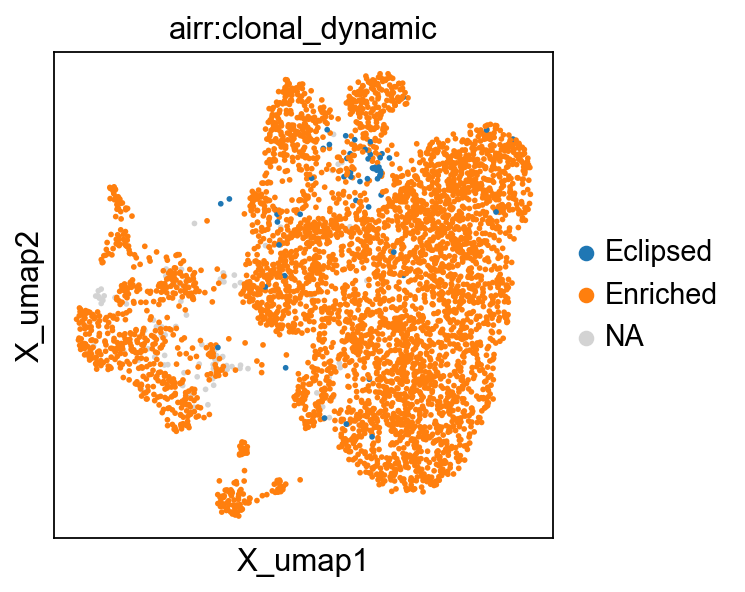

In [33]:
mu.pl.embedding(
    mdata,
    basis="gex:umap",
    color="airr:clonal_dynamic"
)

Dropout cells with NA clonal_dynamic labeling

In [34]:
valid_cells = mdata["airr"].obs[~mdata["airr"].obs["clonal_dynamic_label"].isna()].index
mdata_filtered = mdata[valid_cells].copy()

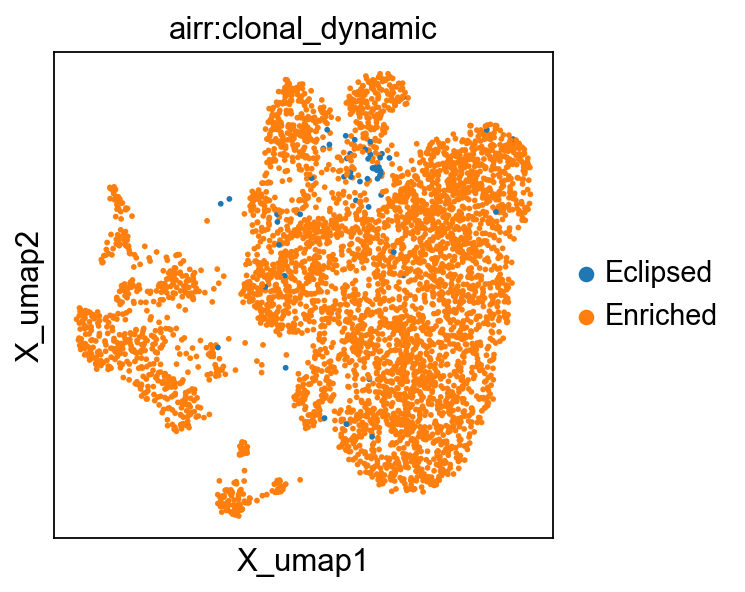

In [35]:
mu.pl.embedding(
    mdata_filtered,
    basis="gex:umap",
    color="airr:clonal_dynamic"
)

Differential expression genes (Enriched vs Eclipsed)

In [39]:
# Map clonal_labeling to gene expression
mdata_filtered["gex"].obs["clonal_dynamic_label"] = mdata_filtered["airr"].obs["clonal_dynamic_label"]
mdata_filtered["gex"].obs["clonal_dynamic"] = mdata_filtered["airr"].obs["clonal_dynamic"]

In [49]:
mdata_filtered["gex"].obs["clone_id"] = mdata_filtered["airr"].obs["clone_id"]

In [42]:
mdata_filtered.update()

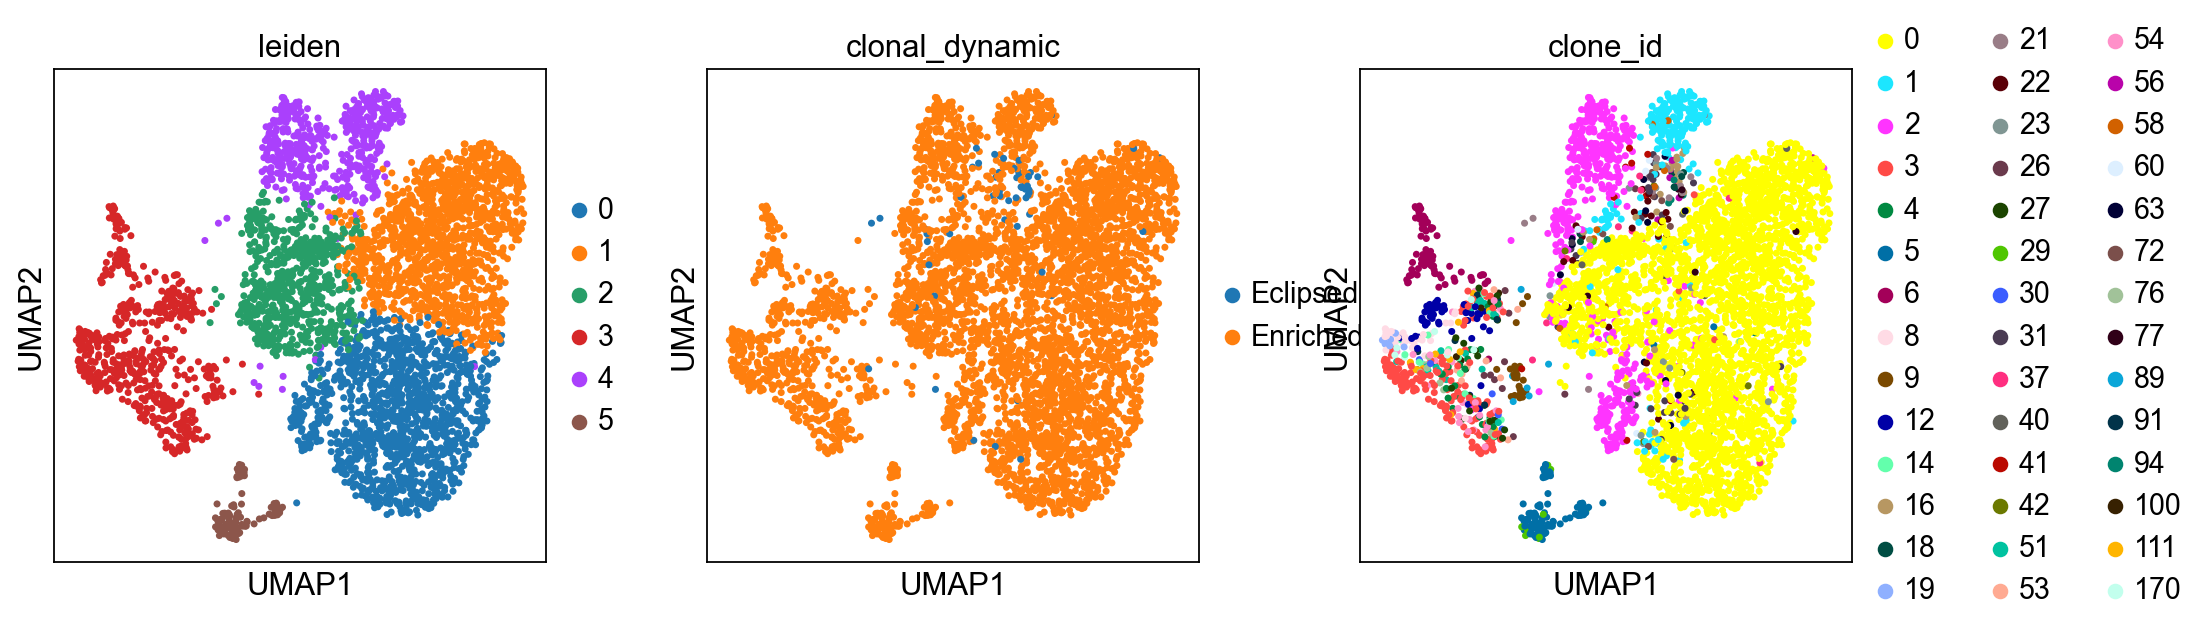

In [51]:
sc.pl.umap(mdata_filtered["gex"], color=["leiden", "clonal_dynamic", "clone_id"], size=40)

In [45]:
sc.tl.rank_genes_groups(mdata_filtered["gex"], groupby="clonal_dynamic", method="wilcoxon")

ranking genes


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:06)


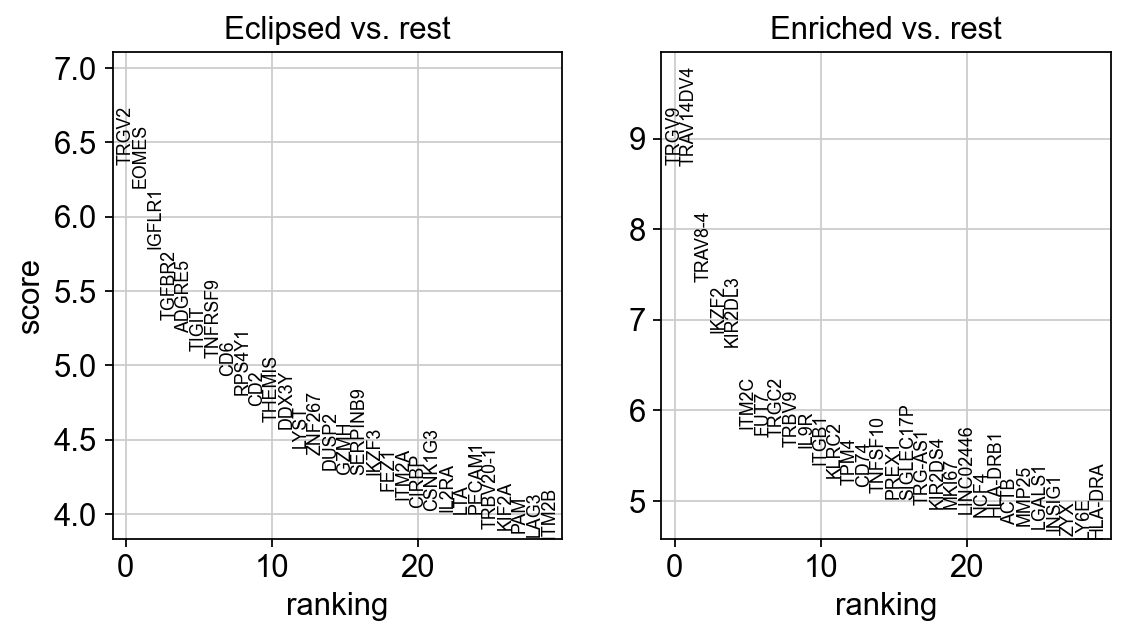

In [46]:
sc.pl.rank_genes_groups(mdata_filtered["gex"], n_genes=30, sharey=False)

In [52]:
deg_df = sc.get.rank_genes_groups_df(mdata_filtered["gex"], group=None, pval_cutoff=0.05)
deg_df.to_csv("/Users/jerryaaaaaa/clonal_degs.csv")

In [58]:
mdata.write("/Users/jerryaaaaaa/clonal_label.h5mu")